<a href="https://colab.research.google.com/github/charleshart0301/DSPS_cHart/blob/main/HW2/Charles_Hart_Instructions_Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [ ]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
...

Ellipsis

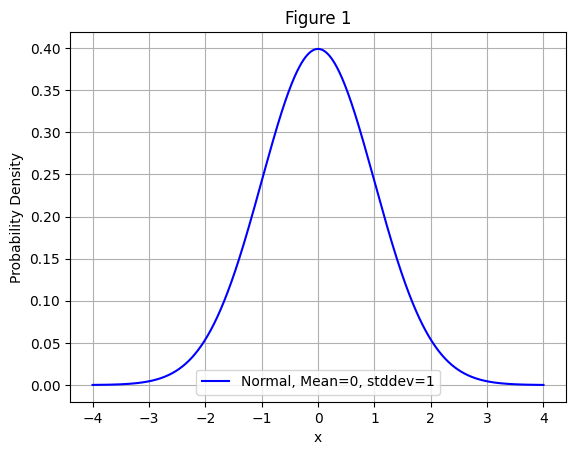

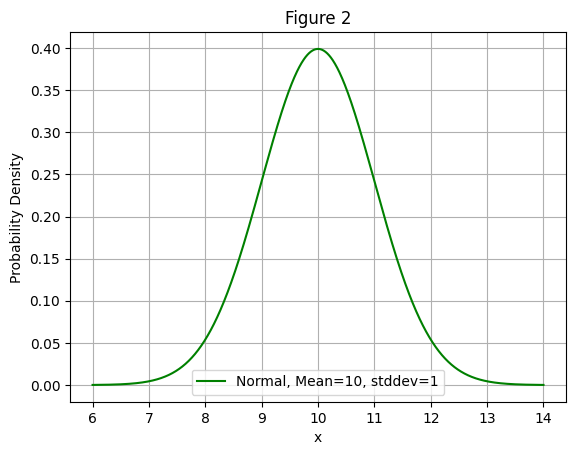

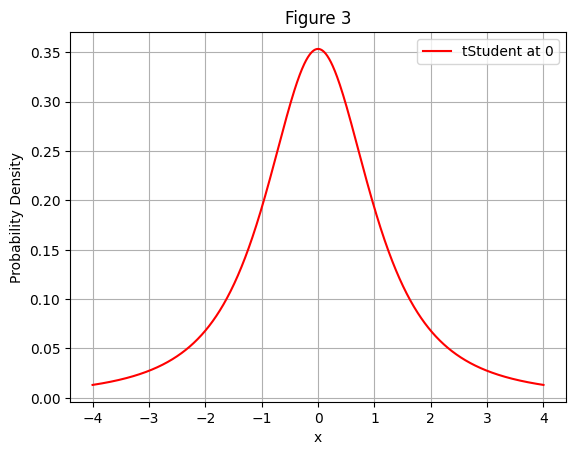

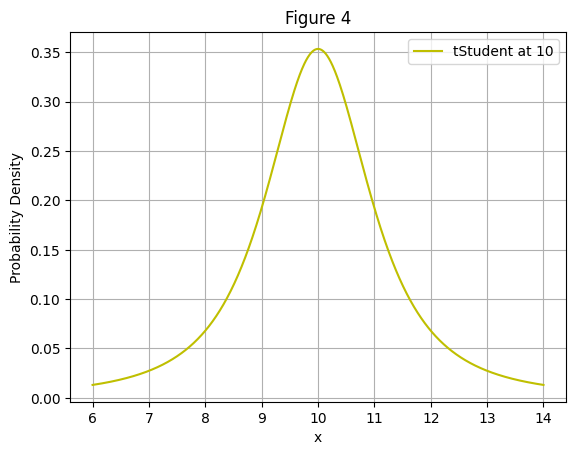

In [69]:
normal_mean0_scale1 = np.linspace(-4, 4, 1000)

Norm_0 = stats.norm.pdf(normal_mean0_scale1,loc=0,scale=1)
plt.plot(normal_mean0_scale1, Norm_0, 'b-', label='Normal, Mean=0, stddev=1')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Figure 1')
plt.legend()
plt.grid(True)
plt.show()

normal_mean10_scale1 = np.linspace(6, 14, 1000)
Norm_10 = stats.norm.pdf(normal_mean10_scale1,loc=10, scale =1)
plt.plot(normal_mean10_scale1, Norm_10, 'g-', label='Normal, Mean=10, stddev=1')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Figure 2')
plt.legend()
plt.grid(True)
plt.show()

tstudent_located0 = np.linspace(-4,4,1000)
tStudent_0 = stats.t.pdf(tstudent_located0, 2, loc=0)
plt.plot(tstudent_located0, tStudent_0, 'r-', label='tStudent at 0')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Figure 3')
plt.legend()
plt.grid(True)
plt.show()


tstudent_located10 = np.linspace(6,14,1000)
tStudent_10 = stats.t.pdf(tstudent_located10, 2, loc=10)
plt.plot(tstudent_located10, tStudent_10, 'y-', label='tStudent at 10')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Figure 4')
plt.legend()
plt.grid(True)
plt.show()



In [90]:
def posterior(prior, likelihood):
  """normalized_prior = stats.norm(prior)
  normalized_likelihood = stats.norm(likelihood)
  this_posterior = prior * likelihood"""
  normalized_prior = prior/np.max(prior)
  normalized_likelihood = likelihood/np.max(likelihood)
  this_posterior = normalized_prior * normalized_likelihood
  x = np.linspace(-4, 4, 1000)
  """plt.plot(x, stats.norm(this_posterior),'k--')
  plt.plot(x, stats.norm(likelihood),'k-')
  plt.plot(x, stats.norm(prior), 'r-')"""
  """plt.plot(x, this_posterior, 'k--')
  plt.plot(x, likelihood, 'k-')
  plt.plot(x, prior, 'r-')"""
  plt.plot(x, this_posterior, 'k--')
  plt.plot(x, normalized_likelihood, 'k-')
  plt.plot(x, normalized_prior, 'r-')
  plt.xlabel('x')
  plt.ylabel('probability distribution')

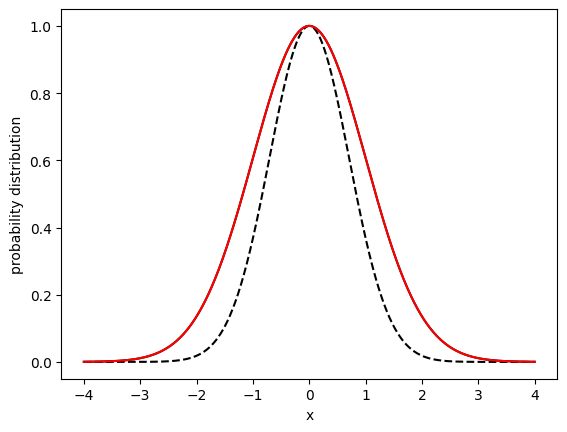

In [96]:
posterior(Norm_0,Norm_10)

Figure 1. In this graph, the likelihood and the prior are actually overlapping. The calculated posterior probability can be seen in the dashed black lines. The posterior is highest in the regional where the two overlap while it goes to 0 even faster than the Gaussians. This is simply occuring due to the math of multiplying the two sets together. This should mean that the data is relatively believable.

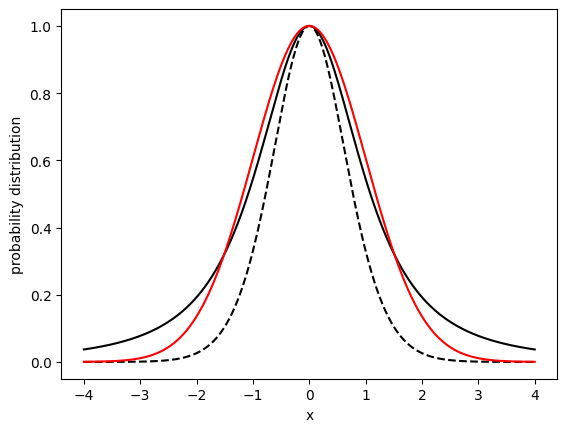

In [92]:
posterior(Norm_0,tStudent_0)

Figure 2. In this figure, the Gaussian centered at 0 is the prior, while the t-student centered at 0 is the likelihood. The posterior is slightly thinner than the previous example indicating that the data is more certain than the previous. However, due to the strong overlap in both this figure and the previous, the posterior remains relatively wide.

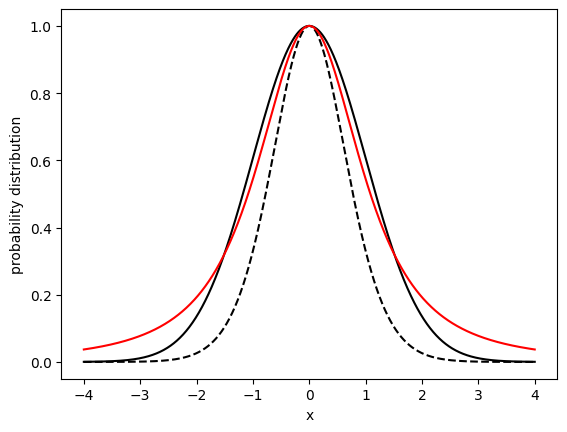

In [97]:
posterior(tStudent_10,Norm_10)

Figure 3. This one shows the reverse of the previous. The difference is that it is using the Gaussian and t-student centered at 10 instead of 0. Regardless, the results are still the same as the last. The only difference on the figure is the colors. The t-student, which has the broader tails, can be seen in red. The Gaussian is in black.

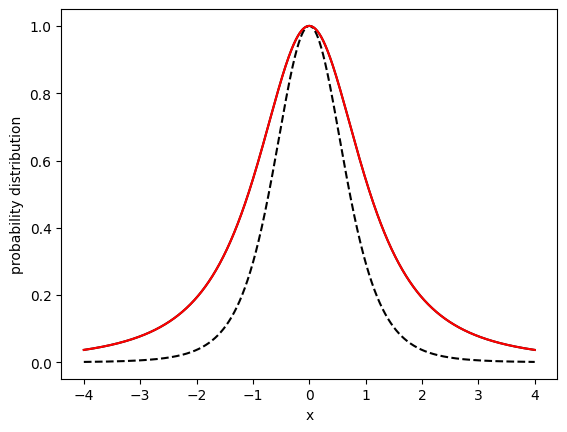

In [94]:
posterior(tStudent_0,tStudent_10)

Figure 4. This figure mirrors the first, however, it is using both t-Students as likelihood and prior. The posterior reflects the geometry of those probability distribtions by being sharper than that in figure 1. Both t-Students are also overlapping here.